# Capstone Project — The Battle of Neighbourhoods

# Introduction


New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .

# Questions that can be asked using the above mentioned datasets


- What is best location in New Delhi City for Chinese Cuisine ?
- Which areas have large number of Chinese Resturant Market ?
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

# Data

For this project we need the following data :

- New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
- Data source : Zomato kaggel dataset
- Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
- Nearby places in each locality of new delhi city.
- Data source : Fousquare API
- Description : By using this api we will get all the venues in each neighborhood.


# Approach

- Collect the new delhi city data from Zomato kaggel dataset
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

# DATA CLEANING


In [6]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [7]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

# CREATED MAP TO SHOW CLUSTERS


In [9]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [10]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

# What places are have best restaurant in New Delhi?¶


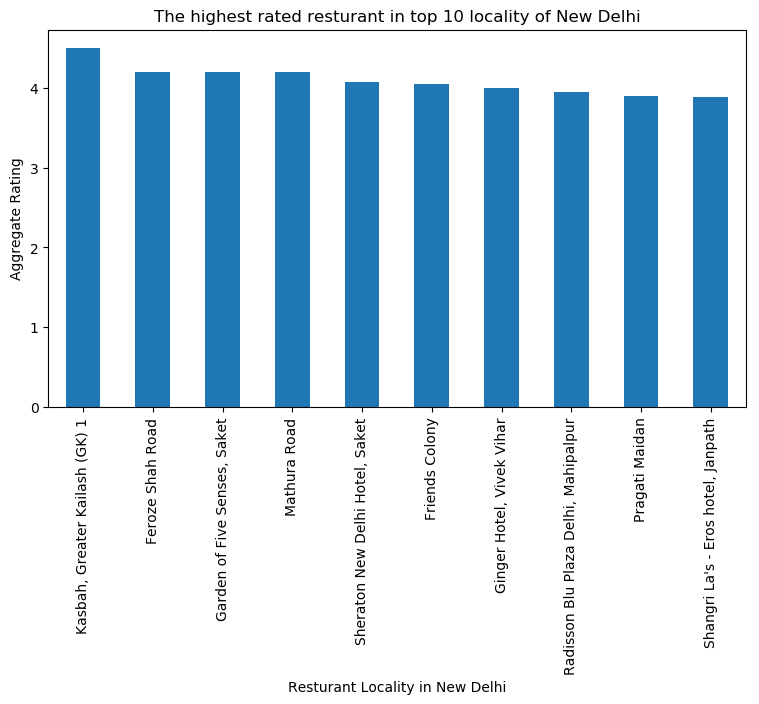

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in Kesbah, Greater Kailash area.



# what places are have worst restaurants in New Delhi?¶


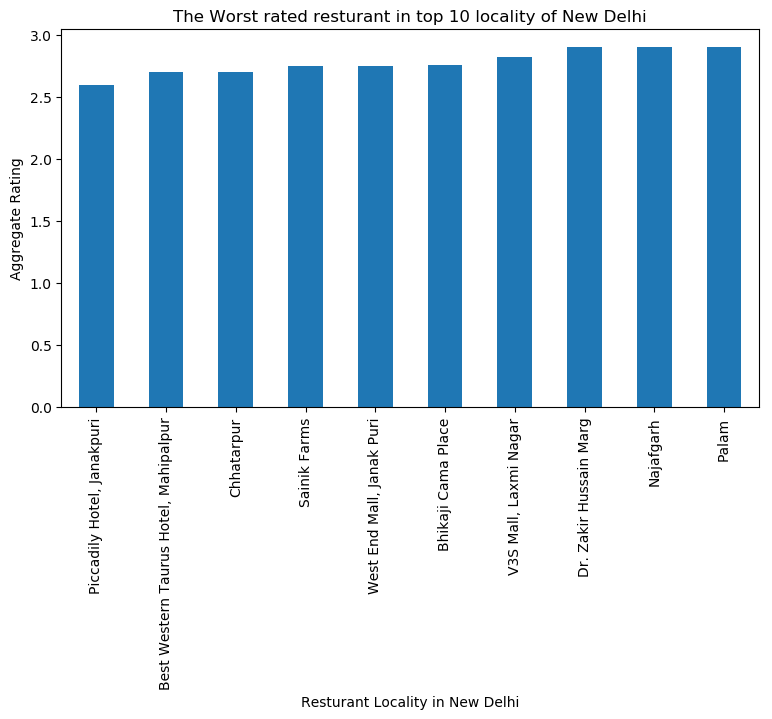

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()


The worst restarants are available in Piccadily Hotel, Janakpuri.

# Which place are suitable for edible person in New Delhi city?¶


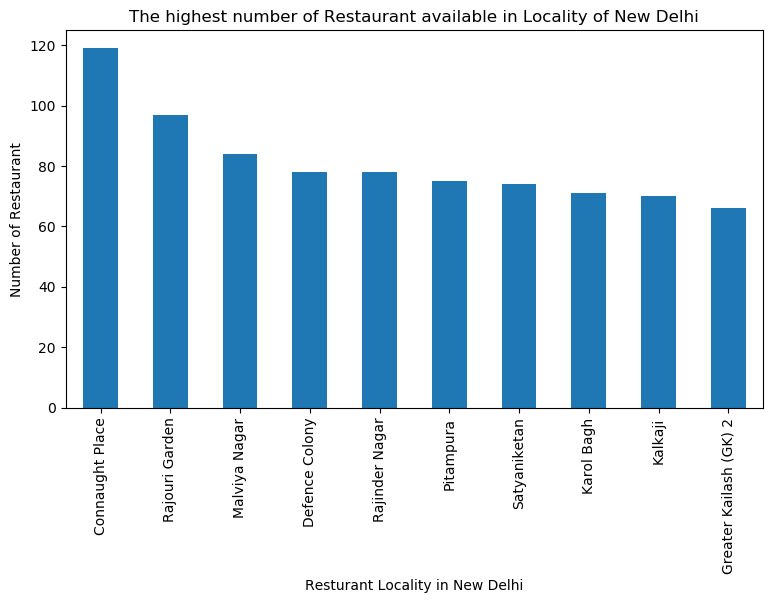

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Connaught Place is the best places for edible person to stay there.



# Which place are not suitable for edible person in New Delhi city?


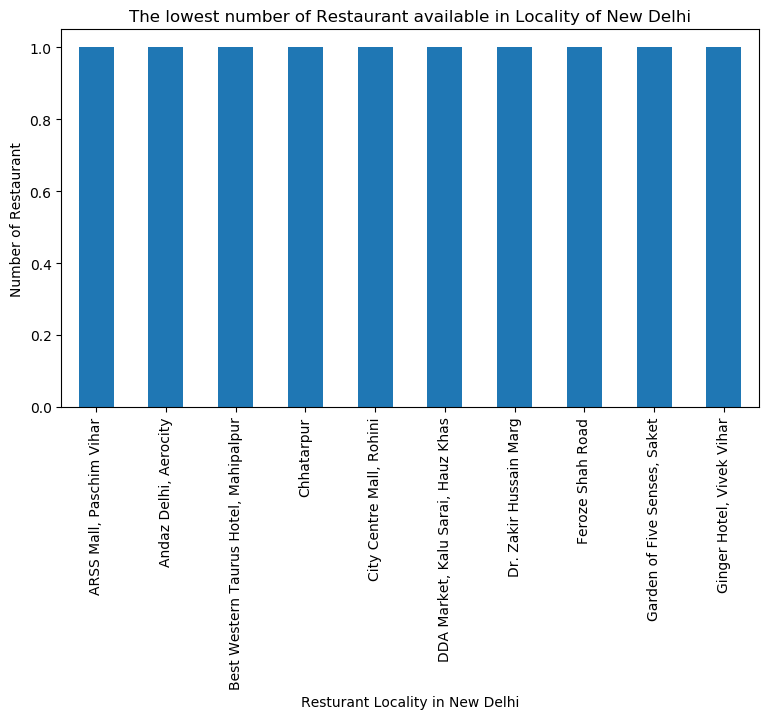

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

# What are the best places for chinese restaurant in New Delhi city


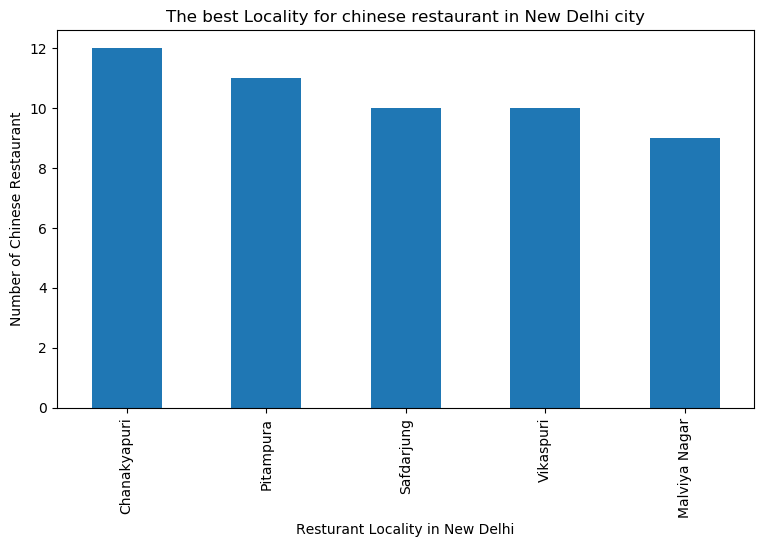

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

Chanakyapuri is the best place for Chinese restaurant.



# which places are the best chinese resturants in New Delhi?


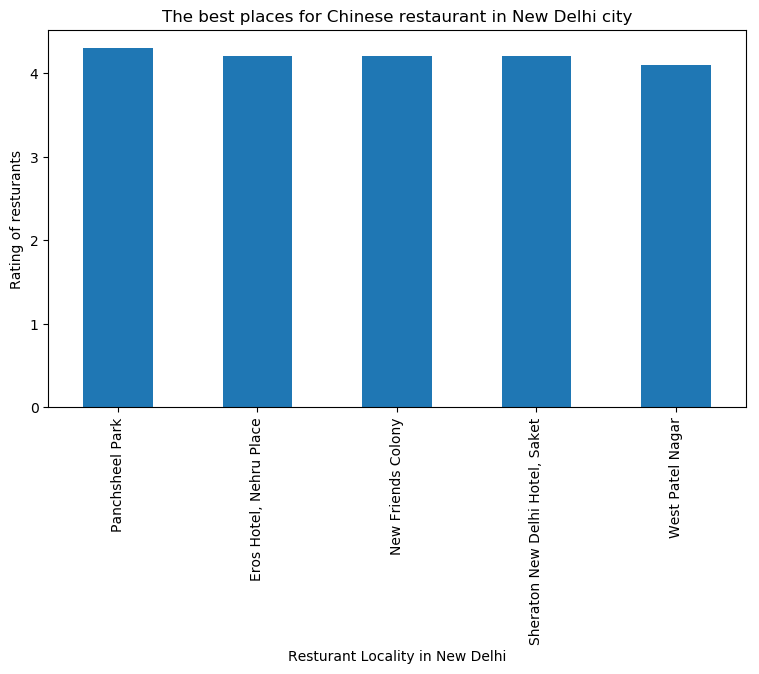

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()


Panchsheel park is best Chinese resturants.



# Data transformation 


Based on Locality grouping the data



In [22]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [23]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [25]:
df_final.shape


(240, 8)

# Define Foursquare Credentials and Version 


In [26]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'LXATLXQ3BHXZMXWST4QD1TS3YZEHM4HNOWDDDE2UUASSHQPA' # Foursquare ID
CLIENT_SECRET = '0TFIUVQSIUD1Q0XVT5UIOUFOBEQEOWT4OOSUMPECPWL0RCB2' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LXATLXQ3BHXZMXWST4QD1TS3YZEHM4HNOWDDDE2UUASSHQPA
CLIENT_SECRET:0TFIUVQSIUD1Q0XVT5UIOUFOBEQEOWT4OOSUMPECPWL0RCB2


# create a function to repeat the same process to all the Locality in New Delhi


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Find the venues in all New Delhi Locality


In [28]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [31]:
new_Delhi_venues.head()


Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [32]:
new_Delhi_venues.groupby('Locality').count()


Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         7   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   4   
Aggarwal City Plaza, Rohini                                     9   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     5   
Andaz Delhi, Aerocity                                          24   
Ansal Plaza Mall, Khel Gaon Marg                                4   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             5   
Barakhamba Road                                                14   
Basant Lok Market, Vasant Vihar                                25   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                          14   
Bhikaji Cama Place                                             12   
Chanakyapuri                                                    5   
Chander Nagar                                                   1   
Chandni Chowk                                                  18   
Chawri Bazar                                                    6   
Chhatarpur                                                      5   
Chittaranjan Park                                               4   
City Centre Mall, Rohini                                        8   
City Square Mall, Rajouri Garden                               25   
Civil Lines                                                     5   
...                                                           ...   
The Leela Ambience Convention Hotel                             4   
The Leela Palace, Chanakyapuri                                 12   
The Lodhi, Lodhi Road                                          13   
The Park, Connaught Place                                      29   
The Suryaa New Delhi, New Friends Colony                       20   
The Taj Mahal Hotel, Mansingh Road                              7   
The Taj Palace Hotel, Chanakyapuri                             34   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 11   
Tilak Nagar                                                     6   
Tughlakabad Institutional Area                                  6   
Uday Park                                                       6   
Unity One Mall, Janakpuri                                       8   
Uttam Nagar                                                     4   
V3S Mall, Laxmi Nagar                                          10   
Vasant Kunj                                                     7   
Vasant Square Mall, Vasant Kunj                                 9   
Vasant Vihar                                                   29   
Vasundhara Enclave                                              2   
Vijay Nagar                                                    14   
Vikas Marg                                                      4   
Vikaspuri                                                       3   
Vivek Vihar                                                     5   
Wazirpur                                                        1   
West End Mall, Janak Puri                                      15   
West Gate Mall, Rajouri Garden                

In [33]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))


There are 213 uniques categories.


In [34]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Train Station  \
0                 0                    0  ...              0   
1                 0                    0  ...              0   
2                 0                    0  ...              0   
3                 0                    0  ...              0   
4                 0                    0  ...              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  \
0                      0           0         0            0              0   
1                      0           0         0            0              0   
2                      0           0         0            0              0   
3                      0           0         0            0              0   
4                      0           0         0            0              0   

   Yoga Studio  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 214 columns]

In [35]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
..                                              ...       ...   
209             The Leela Ambience Convention Hotel  0.000000   
210                  The Leela Palace, Chanakyapuri  0.000000   
211                           The Lodhi, Lodhi Road  0.000000   
212                       The Park, Connaught Place  0.000000   
213        The Suryaa New Delhi, New Friends Colony  0.000000   
214              The Taj Mahal Hotel, Mansingh Road  0.000000   
215              The Taj Palace Hotel, Chanakyapuri  0.000000   
216                             The Uppal, Aerocity  0.000000   
217  The Village Restaurant Complex, Khel Gaon Marg  0.000000   
218                                     Tilak Nagar  0.000000   
219                  Tughlakabad Institutional Area  0.000000   
220                                       Uday Park  0.000000   
221                       Unity One Mall, Janakpuri  0.000000   
222                                     Uttam Nagar  0.500000   
223                           V3S Mall, Laxmi Nagar  0.000000   
224                                     Vasant Kunj  0.000000   
225                 Vasant Square Mall, Vasant Kunj  0.000000   
226                                    Vasant Vihar  0.000000   
227                              Vasundhara Enclave  0.500000   
228                                     Vijay Nagar  0.000000   
229                                      Vikas Marg  0.000000   
230                                       Vikaspuri  0.000000   
231                                     Vivek Vihar  0.000000   
232                                        Wazirpur  0.000000   
233                       West End Mall, Janak Puri  0.000000   
234                  West Gate Mall, Rajouri Garden  0.000000   
235                                West Patel Nagar  0.000000   
236                           Worldmark 1, Aerocity  0.000000   
237                                     Yusuf Sarai  0.000000   
238                        ibis New Delhi, Aerocity  0.000000   

     Accesso

In [36]:
New_Delhi_grouped.shape


(239, 214)

In [37]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2         Pizza Place  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2                Pub  0.14
3   Parsi Restaurant  0.14
4         Restaurant  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2  Indian Restaurant   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1  Rental Car Location  0.14
2       Airport Lounge  0.14
3          Coffee Shop  0.14
4     Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0      Department Store  0.25
1            Donut Shop  0.25
2           Pizza Place  0.25
3    Chinese Restaurant  0.25
4  Other Great Outdoors  0.00


--

               venue  freq
0  Indian Restaurant  0.11
1               Café  0.08
2     Clothing Store  0.07
3             Lounge  0.07
4                Bar  0.07


----DLF Promenade Mall, Vasant Kunj----
                venue  freq
0         Coffee Shop  0.09
1  Italian Restaurant  0.07
2                Café  0.07
3       Shopping Mall  0.07
4      Clothing Store  0.07


----DLF South Square, Sarojini Nagar----
                  venue  freq
0     Indian Restaurant  0.33
1  Fast Food Restaurant  0.17
2      Department Store  0.08
3          Dessert Shop  0.08
4           Pizza Place  0.08


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.29
1             Hostel  0.14
2              Hotel  0.14
3         Restaurant  0.14
4               Bank  0.07


----Defence Colony----
                     venue  freq
0       Italian Restaurant  0.17
1        Indian Restaurant  0.17
2                   Bakery  0.11
3  South Indian Restaurant  0.06
4               Restaurant  0.06


               venue  freq
0      Shopping Mall  0.25
1  Indian Restaurant  0.25
2     Scenic Lookout  0.25
3               Café  0.25
4                ATM  0.00


----JW Marriott New Delhi----
                 venue  freq
0                Hotel  0.33
1            Hotel Bar  0.07
2          Coffee Shop  0.07
3  Japanese Restaurant  0.04
4   Punjabi Restaurant  0.04


----Jail Road----
                  venue  freq
0     Indian Restaurant   0.2
1     Indian Sweet Shop   0.1
2                Bakery   0.1
3   Fried Chicken Joint   0.1
4  Fast Food Restaurant   0.1


----Jama Masjid----
                venue  freq
0   Indian Restaurant  0.38
1         Flea Market  0.12
2              Mosque  0.12
3  Frozen Yogurt Shop  0.12
4       Metro Station  0.12


----Janakpuri----
    venue  freq
0    Café   0.4
1     Gym   0.2
2  Bakery   0.2
3    Park   0.2
4     ATM   0.0


----Jangpura----
                  venue  freq
0        Sandwich Place  0.29
1    Chinese Restaurant  0.14
2  Fast Food Rest

                  venue  freq
0                   ATM  0.33
1           Pizza Place  0.17
2     Indian Restaurant  0.17
3  Gym / Fitness Center  0.17
4                Bistro  0.17


----Mayur Vihar Phase 2----
            venue  freq
0       Juice Bar   0.2
1     Wings Joint   0.2
2  Ice Cream Shop   0.2
3            Café   0.2
4  Sandwich Place   0.2


----Mayur Vihar Phase 3----
                     venue  freq
0  Health & Beauty Service   0.5
1                    Hotel   0.5
2                      ATM   0.0
3                   Office   0.0
4                   Museum   0.0


----Mehrauli----
                 venue  freq
0      Thai Restaurant   0.3
1                  Bar   0.2
2  Japanese Restaurant   0.1
3   Italian Restaurant   0.1
4  Monument / Landmark   0.1


----Metro Walk Mall, Rohini----
                  venue  freq
0           Pizza Place   0.2
1         Shopping Mall   0.2
2  Fast Food Restaurant   0.2
3      Asian Restaurant   0.2
4            Theme Park   0.2


----Model

                  venue  freq
0                 Hotel  0.33
1     Indian Restaurant  0.17
2           Coffee Shop  0.17
3            Food Truck  0.17
4  Fast Food Restaurant  0.17


----Rajendra Place----
                            venue  freq
0                     Pizza Place   0.2
1            Fast Food Restaurant   0.2
2                     Coffee Shop   0.1
3              Chinese Restaurant   0.1
4  Multicuisine Indian Restaurant   0.1


----Rajinder Nagar----
                  venue  freq
0        Sandwich Place  0.14
1           Pizza Place  0.14
2  Gym / Fitness Center  0.14
3                Market  0.14
4                Bakery  0.14


----Rajouri Garden----
                  venue  freq
0                  Café   0.2
1                   Pub   0.1
2                Market   0.1
3  Fast Food Restaurant   0.1
4             Bike Shop   0.1


----Rohini----
                  venue  freq
0      Department Store  0.17
1    Light Rail Station  0.17
2                   Gym  0.17
3  Fast 

           venue  freq
0    Pizza Place  0.25
1  Shopping Mall  0.25
2          Hotel  0.25
3           Café  0.25
4            ATM  0.00


----The Leela Palace, Chanakyapuri----
                         venue  freq
0            Indian Restaurant  0.17
1          Japanese Restaurant  0.08
2                Train Station  0.08
3                 Cocktail Bar  0.08
4  Northeast Indian Restaurant  0.08


----The Lodhi, Lodhi Road----
                venue  freq
0   Indian Restaurant  0.15
1  Chinese Restaurant  0.15
2   Convenience Store  0.08
3           Hotel Bar  0.08
4        Cocktail Bar  0.08


----The Park, Connaught Place----
                      venue  freq
0                     Hotel  0.14
1                       Spa  0.07
2  Mediterranean Restaurant  0.07
3        Italian Restaurant  0.07
4             Metro Station  0.07


----The Suryaa New Delhi, New Friends Colony----
                       venue  freq
0                       Café  0.15
1                Pizza Place  0.10
2  

In [38]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                                           Adchini                  Café   
2                     Aditya Mega Mall, Karkardooma           Pizza Place   
3                                          Aerocity                 Hotel   
4                     Aggarwal City Mall, Pitampura      Department Store   
5                       Aggarwal City Plaza, Rohini  Fast Food Restaurant   
6                                         Alaknanda           Coffee Shop   
7                        Ambience Mall, Vasant Kunj           Coffee Shop   
8                                         Anand Lok                  Café   
9                                       Anand Vihar                  Café   
10                            Andaz Delhi, Aerocity                 Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg      Department Store   
12                                    Asaf Ali Road     Indian Restaurant   
13                              Ashok Vihar Phase 1           Snack Place   
14                              Ashok Vihar Phase 2           Coffee Shop   
15                              Ashok Vihar Phase 3           Pizza Place   
16                                  Barakhamba Road                Bakery   
17                  Basant Lok Market, Vasant Vihar                  Café   
18                    Bellagio, Ashok Vihar Phase 2           Coffee Shop   
19            Best Western Taurus Hotel, Mahipalpur                 Hotel   
20                               Bhikaji Cama Place                Lounge   
21                                     Chanakyapuri                  Café   
22                                    Chander Nagar           Pizza Place   
23                                    Chandni Chowk     Indian Restaurant   
24                                     Chawri Bazar        Hardware Store   
25                                       Chhatarpur   Japanese Restaurant   
26                                Chittaranjan Park                Market   
27                         City Centre Mall, Rohini         Shopping Mall   
28                 City Square Mall, Rajouri Garden     Indian Restaurant   
29                                      Civil Lines            Smoke Shop   
..                                              ...                   ...   
209             The Leela Ambience Convention Hotel           Pizza Place   
210                  The Leela Palace, Chanakyapuri     Indian Restaurant   
211                           The Lodhi, Lodhi Road     Indian Restaurant   
212                       The Park, Connaught Place                 Hotel   
213        The Suryaa New Delhi, New Friends Colony                  Café   
214              The Taj Mahal Hotel, Mansingh Road   Japanese Restaurant   
215              The Taj Palace Hotel, Chanakyapuri     Indian Restaurant   
216                             The Uppal, Aerocity                 Hotel   
217  The Village Restaurant Complex, Khel Gaon Marg                   Bar   
218                                     Tilak Nagar  Fast Food Restaurant   
219                  Tughlakabad Institutional Area            Restaurant   
220                                       Uday Park                Market   
221                       Unity One Mall, Janakpuri        Sandwich Place   
222                                     Uttam Nagar                   ATM   
223                           V3S Mall, Laxmi Nagar           Pizza Place   
224                                     Vasant Kunj           Pizza Place   
225                 Vasant Square Mall, Vasant Kunj           Pizza Place   
226                                    Vasant Vihar                  Café   
227                              Vasundhara Enclave                   ATM   
228                                     Vijay Nagar                  Café   
229                                    

In [60]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [61]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               3   
1  Average, Good, Poor, Very Good         1560               3   
2                   Average, Good          434               3   
3                         Average           59               4   
4                         Average          126               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Coffee Shop   
1                  Café     Indian Restaurant                   Pub   
2           Pizza Place             Multiplex     Indian Restaurant   
3                 Hotel      Airport Terminal        Airport Lounge   
4      Department Store           Pizza Place            Donut Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Pizza Place        Sandwich Place    Chinese Restaurant   
1      Parsi Restaurant            Restaurant           Yoga Studio   
2         Shopping Mall                 Hotel                  Café   
3   Rental Car Location           Coffee Shop  Fast Food Restaurant   
4    Chinese Restaurant     Fish & Chips Shop           Gaming Cafe   

    7th Most Common Venue           8th Most Common Venue  \
0                  Market  Multicuisine Indian Restaurant   
1      Frozen Yogurt Shop             Fried Chicken Joint   
2    Fast Food Restaurant             Fried Chicken Joint   
3     Fried Chicken Joint               French Restaurant   
4  Furniture / Home Store              Frozen Yogurt Shop   

  9th Most Common Venue 10th Most Common Venue  
0   Dumpling Restaurant           Dessert Shop  
1     French Restaurant             Food Truck  
2     French Restaurant             Food Truck  
3           Flea Market     Frozen Yogurt Shop  
4   Fried Chicken Joint      French Restaurant

In [62]:
#CREATE FINAL MAP

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [63]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
16   28.630440    3.208333                        Average, Good, Poor   
17   28.557846    3.220000                        Average, Good, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
26   28.538688    3.130303                        Average, Good, Poor   
30   28.561898    3.100000                              Average, Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
50   28.645084    3.235000             Average, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
64   28.538014    3.475000                              Average, Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
73   28.643036    3.000000                                    Average   
78   28.597665    3.733333                   Average, Good, Very Good   
81   28.536611    3.380000                         Average, Excellent   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
91   28.556503    3.400000                              Average, Good   
93   28.554084    3.541667                   Average, Good, Very Good   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
103  28.652501    3.080000                        Average, Good, Poor   
108  28.563827    3.800000                            Good, Very Good   
115  28.588675    3.285714                   Average, Good, Very Good   
121  28.702381    3.100000                                    Average   
122  28.535807    3.417857             Average, Good, Poor, Very Good   
123  28.626791    3.250000                                    Average   
127  28.619410    3.134615                        Average, Good, Poor   
135  28.579641    3.180000                              Average, Good   
137  28.708865    3.008696                              Average, Good   
143  28.564494    3.140625                   Average, Good, Very Good   
147  28.523307    3.430769             Average, Good, Poor, Very Good   
150  28.592401    2.900000                                    Average   
158  28.700027    3.157333                        Average, Good, Poor   
170  28.643757    3.575000                              Average, Good   
171  28.639604    3.056410             Average, Good, Poor, Very Good   
174  28.550802    3.250000                              Average, Good   
176  28.562460    3.269231             Average, Good, Poor, Very Good   
177  28.511482    2.750000                              Average, Poor   
179  28.572117    3.871429                   Average, Good, Very Good   
181  28.571849    3.316667                              Average, Good   
184  28.528743    3.764000  Average, Excellent, Good, Poor, Very Good   
189  28.620715    3.880000                   Average, Good, Very Good   
190  28.577107    3.100000                                    Average   
199  28.601779    3.700000                   Average, Good, Very Good   
202  28.646593    3.280952                   Average, Good, Very Good   
207  28.625445    3.600000                   Average, Good, Very Good   
209  28.631362    3.537500                              Average, Good   
213  28.623619    3.466667                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good   
220  28.523519    3.700000                                       Good   
223  28.619954    2.905714                              Average, Poor

In [64]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
22   28.654105    3.085714        Average           80               1   
104  28.656263    3.097619  Average, Good          965               1   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
22            Pizza Place           Yoga Studio     Fish & Chips Shop   
104           Pizza Place     Accessories Store           Yoga Studio   

    4th Most Common Venue   5th Most Common Venue   6th Most Common Venue  \
22            Gaming Cafe  Furniture / Home Store      Frozen Yogurt Shop   
104     Fish & Chips Shop             Gaming Cafe  Furniture / Home Store   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
22    Fried Chicken Joint     French Restaurant            Food Truck   
104    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   

    10th Most Common Venue  
22              Food Court  
104             Food Truck

In [65]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
4    28.690020    3.033333                                    Average   
5    28.700516    3.040000                        Average, Good, Poor   
6    28.527088    3.117391                        Average, Good, Poor   
7    28.541298    3.425000                   Average, Good, Very Good   
11   28.562580    3.750000                   Average, Good, Very Good   
15   28.691136    3.390909                   Average, Good, Very Good   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
29   28.681233    3.300000                   Average, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
34   28.720602    3.600000                                       Good   
36   28.692546    3.480000                              Average, Good   
37   28.541903    3.000000                                    Average   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
51   28.557166    3.080000                         Average, Very Good   
52   28.551417    3.505000                   Average, Good, Very Good   
53   28.549856    3.720000                   Average, Good, Very Good   
54   28.543798    3.500000                              Average, Good   
57   28.699837    3.376471                   Average, Good, Very Good   
59   28.654883    3.053846                              Average, Good   
67   28.554545    3.251786        Average, Excellent, Good, Very Good   
79   28.631930    3.300000                              Average, Good   
87   28.582031    3.117143             Average, Good, Poor, Very Good   
90   28.642755    3.450000                              Average, Good   
94   28.538153    3.117143                        Average, Good, Poor   
95   28.681154    3.453448                   Average, Good, Very Good   
..         ...         ...                                        ...   
153  28.608055    3.860000                   Average, Good, Very Good   
154  28.618935    2.900000                                    Average   
160  28.712975    3.066667                                    Average   
165  28.539464    2.900000                                    Average   
166  28.569093    3.175000             Average, Good, Poor, Very Good   
169  28.667261    3.200000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
178  28.520095    3.256250             Average, Good, Poor, Very Good   
180  28.534499    3.000000                        Average, Good, Poor   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   
183  28.670776    3.100000                                    Average   
185  28.683364    3.000000                              Average, Good   
186  28.548922    3.715385  Average, Excellent, Good, Poor, Very Good   
191  28.522279    3.100000                                    Average   
193  28.569983    3.133333                        Average, Good, Poor   
194  28.566717    3.303125                   Average, Good, Very Good   
195  28.527731    3.450000                              Average, Good   
197  28.592724    2.985714                                    Average   
200  28.564288    3.200000                                    Average   
205  28.600171    3.714286                   Average, Good, Very Good   
212  28.592147    3.350000                              Average, Good   
217  28.535183    3.066667                                    Average   
218  28.552403    3.833333                            Good, Very Good

In [66]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                        Average, Good          434   
12   28.641698    3.050000                              Average           17   
13   28.690182    3.090000                  Average, Good, Poor          971   
14   28.693969    3.378571                        Average, Good         2343   
18   28.696302    3.300000                        Average, Good          415   
23   28.656414    3.358182             Average, Good, Very Good         6668   
31   28.632091    3.779832  Average, Excellent, Good, Very Good       128107   
33   28.657388    3.320000                        Average, Good          636   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
44   28.574288    3.496154       Average, Good, Poor, Very Good        15579   
46   28.573241    3.225000                  Average, Good, Poor         1106   
47   28.681582    3.046875                  Average, Good, Poor         1224   
48   28.630149    2.950000                  Average, Good, Poor          471   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
65   28.556980    3.272414                  Average, Good, Poor         5243   
66   28.699373    3.252174                        Average, Good          973   
71   28.641003    3.650000                        Average, Good          367   
74   28.621267    3.416667                        Average, Good          475   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
80   28.611614    3.366667                        Average, Good          291   
82   28.548371    3.137500                  Average, Good, Poor          609   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
88   28.626322    3.587500  Average, Excellent, Good, Very Good         9119   
..         ...         ...                                  ...          ...   
114  28.584615    3.303571       Average, Good, Poor, Very Good         6480   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
124  28.521760    4.200000                            Very Good          278   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
140  28.627959    3.004167                              Average          326   
144  28.591092    3.200000                  Average, Good, Poor          993   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
156  28.630734    3.185714                        Average, Good          244   
157  28.629505    2.600000                              Average           67   
159  28.613748    3.900000                   Average, Excellent         2313   
163  28.552711    3.100000                              Average            7   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
175  28.546931    3.223077                        Average, Good          606   
192  28.526856    4.066667                            Very Good          802   
198  28.636

In [67]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
20   28.568193    2.755556                        Average, Poor          339   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
75   28.569040    3.800000                      Good, Very Good         1513   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
187  28.629634    2.942857                              Average          151   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
3                 4                 Hotel         Airport Terminal   
10                4                 Hotel              Coffee Shop   
19                4                 Hotel        Accessories Store   
20                4                Lounge                    Hotel   
25                4   Japanese Restaurant        Indian Restaurant   
35                4                 Hotel         Department Store   
56                4                 Hotel                     Café   
60                4                 Hotel         Asian Restaurant   
69                4                 Hotel              Coffee Shop   
70                4                 Hotel               Restaurant   
72                4                 Plaza                    Hotel   
75                4                Lounge                    Hotel   
83                4                 Hotel              Coffee Shop   
111               4                 Hotel               Restaurant   
112               4                 Hotel              Coffee Shop   
119               4                 Hotel                    Plaza   
120               4 

## Conclusion


- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
- Pancsheel park, Nehru place have the best Chinese Resturant.
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1: It is most recommended for Indian Restaurants.
#### Cluster 2: It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5: It is most recommended for Fast food. 
#### Cluster 4: It is most recommended for the cafe and pizza.